Let's compute $\chi^2$ vs $\beta$ using Pantheon data:

In [1]:
#Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz as cumtrapz

import os
import git
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
path_datos_global = os.path.dirname(path_git)
os.chdir(path_git); os.sys.path.append('./fr_mcmc/utils/')
from solve_sys import integrator
from data import read_data_pantheon
from supernovae import aparent_magnitude_th, chi2_supernovae

from scipy.constants import c as c_light  # units of m/s
c_light_km = c_light/1000

In [3]:
#%% Import SN Pantheon data
os.chdir(path_git+'/fr_mcmc/source/Pantheon/')
zcmb, zhel, Cinv, mb = read_data_pantheon('lcparam_full_long_zhel.txt')

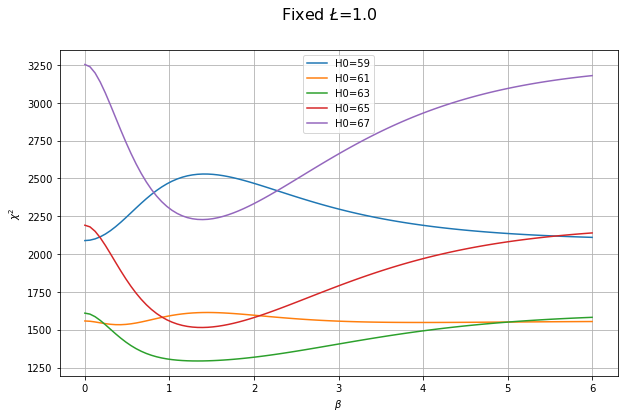

In [28]:
#Define fixed values
M_abs = -19.374
L_bar = 1.

muobs = mb-M_abs

H_0s = np.array([59,61,63,65,67])
#Loop over 1/beta values
#bs = np.linspace(0.01,0.5,100)
betas = np.linspace(0,6,100)

fig, ax = plt.subplots(1,1, figsize=(10,6))
fig.suptitle(r'Fixed $\L$={}'.format(L_bar), fontsize=16)

chi2 = np.zeros((len(betas),len(H_0s)))
for j, H_0 in enumerate(H_0s):
    for i, beta in enumerate(betas):
        params = [1., beta, H_0] #L_bar in units of H0
        zs, Hs = integrator(params)
        int_inv_Hs = cumtrapz(Hs**(-1), zs, initial=0)
        int_inv_Hs_interpolado = interp1d(zs, int_inv_Hs)
        muth = aparent_magnitude_th(int_inv_Hs_interpolado, zcmb, zhel)
        chi2[i,j] = chi2_supernovae(muth, muobs, Cinv)

    ax.plot(betas, chi2[:,j], label='H0={}'.format(H_0))
    #ax[1].plot(bs, chi2[:,j], label='H0={}'.format(H_0))


ax.grid()
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\chi^{2}$')
ax.legend()

plt.savefig(path_git+'/beta_chi2_1.png')
plt.show()

In [5]:
chi2_min_red = min(chi2[:,0])/(len(zcmb)-1)
print(chi2_min_red)
#print(r'$\chi^{2}:$ {}'.format(chi2_min))

betas[np.where(chi2==min(chi2[:,0]))[0][0]] #beta that minimize chi2

1.2609879727874211


2.0

In [70]:
#Define fixed values
M_abs = -19.374
L_bar = 0.9
beta = 3.66
H_0 = 70.3272914
muobs = mb-M_abs
params = [L_bar, beta, H_0] #L_bar in units of H0
zs, Hs = integrator(params)
int_inv_Hs = cumtrapz(Hs**(-1), zs, initial=0)
int_inv_Hs_interpolado = interp1d(zs, int_inv_Hs)
muth = aparent_magnitude_th(int_inv_Hs_interpolado, zcmb, zhel)
print(chi2_supernovae(muth, muobs, Cinv))
print(chi2_supernovae(muth, muobs, Cinv)/(len(zcmb)-1))


1064.1139858657089
1.016345736261422
